In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data =pd.read_csv("kc_house_data.csv")
houses=data.copy()
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
print(houses.info(),houses.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None               

In [83]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [84]:
#data.hist(bins=50, figsize=(20,15))
#plt.show

In [85]:
houses= houses.drop(['date','long','id','floors','yr_built','yr_renovated','zipcode','sqft_lot15','sqft_lot','sqft_basement','condition'],axis=1)
houses.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,lat,sqft_living15
0,221900.0,3,1.00,1180,0,0,7,1180,47.5112,1340
1,538000.0,3,2.25,2570,0,0,7,2170,47.7210,1690
2,180000.0,2,1.00,770,0,0,6,770,47.7379,2720
3,604000.0,4,3.00,1960,0,0,7,1050,47.5208,1360
4,510000.0,3,2.00,1680,0,0,8,1680,47.6168,1800


In [86]:
for i in range(1,len(houses.axes[1])):
    c=houses.iloc[:,i]
    c=c/max(c)
    houses.iloc[:,i]=c
houses

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,lat,sqft_living15
0,221900.0,0.090909,0.12500,0.087149,0.0,0.0,0.538462,0.125399,0.994424,0.215781
1,538000.0,0.090909,0.28125,0.189808,0.0,0.0,0.538462,0.230606,0.998815,0.272142
2,180000.0,0.060606,0.12500,0.056869,0.0,0.0,0.461538,0.081828,0.999169,0.438003
3,604000.0,0.121212,0.37500,0.144756,0.0,0.0,0.538462,0.111583,0.994625,0.219002
4,510000.0,0.090909,0.25000,0.124077,0.0,0.0,0.615385,0.178533,0.996634,0.289855
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,0.090909,0.31250,0.112999,0.0,0.0,0.615385,0.162593,0.998361,0.246377
21609,400000.0,0.121212,0.31250,0.170606,0.0,0.0,0.615385,0.245484,0.994414,0.294686
21610,402101.0,0.060606,0.09375,0.075332,0.0,0.0,0.538462,0.108395,0.996166,0.164251
21611,400000.0,0.090909,0.31250,0.118168,0.0,0.0,0.615385,0.170032,0.994912,0.227053


In [87]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train,test=split_train_test(houses,0.2)
y_train=train['price']
x_train=train.drop(['price'],axis=1)
y_test= test['price']
x_test=test.drop(['price'],axis=1)
x_train

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,lat,sqft_living15
3003,0.090909,0.21875,0.117430,0.0,0.00,0.538462,0.168969,0.993589,0.185185
16537,0.060606,0.12500,0.091581,0.0,0.25,0.461538,0.106270,0.994244,0.344605
12731,0.060606,0.12500,0.090842,0.0,0.00,0.538462,0.093518,0.997989,0.275362
4586,0.090909,0.21875,0.127474,0.0,0.00,0.538462,0.183422,0.991017,0.340419
17594,0.090909,0.21875,0.172821,0.0,0.50,0.692308,0.248672,0.997227,0.455717
...,...,...,...,...,...,...,...,...,...
12629,0.121212,0.12500,0.084195,0.0,0.00,0.384615,0.121148,0.993392,0.233494
15914,0.060606,0.12500,0.079025,0.0,0.00,0.461538,0.113709,0.994659,0.144928
6403,0.090909,0.18750,0.072378,0.0,0.00,0.538462,0.104145,0.998671,0.223833
4705,0.151515,0.12500,0.137371,0.0,0.00,0.538462,0.162593,0.997453,0.307568


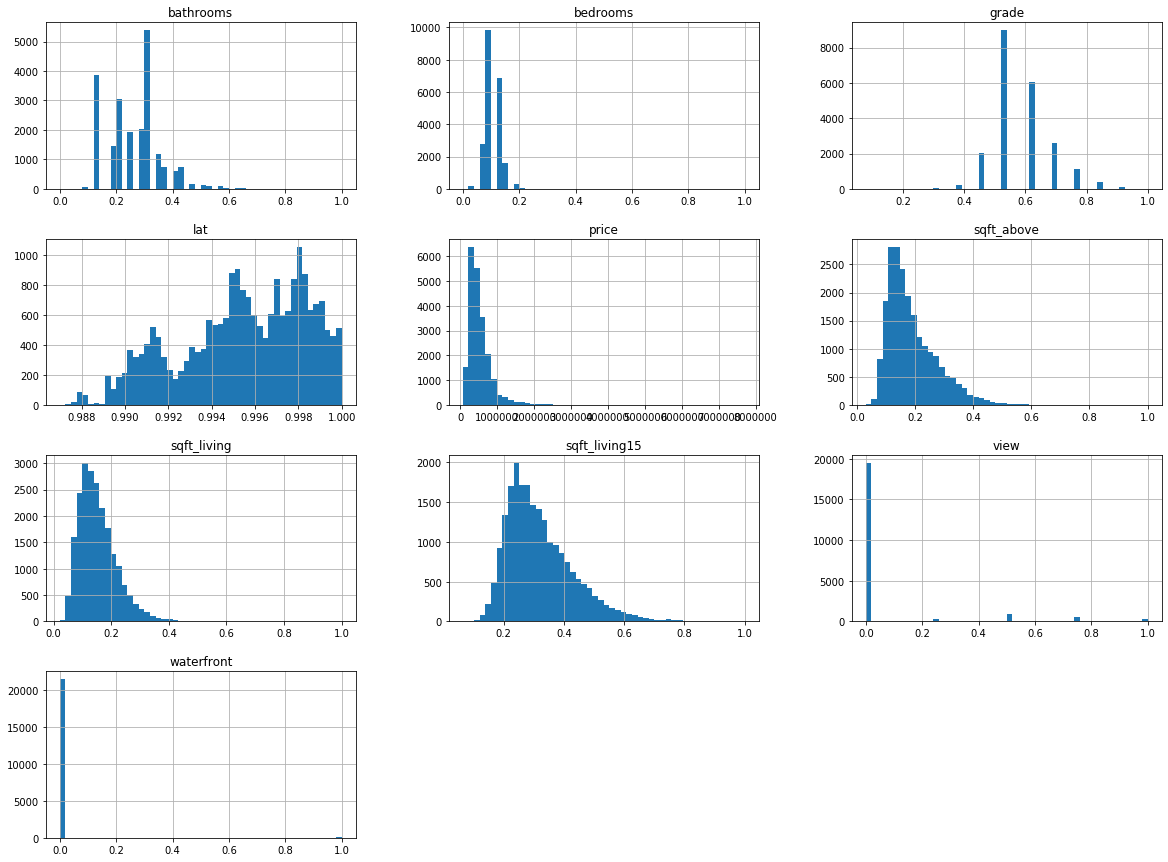

In [88]:
houses.hist(bins=50, figsize=(20,15))
plt.show()

In [89]:
houses.corr()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,lat,sqft_living15
price,1.000000,0.308350,0.525138,0.702035,0.266369,0.397293,0.667434,0.605567,0.307003,0.585379
bedrooms,0.308350,1.000000,0.515884,0.576671,-0.006582,0.079532,0.356967,0.477600,-0.008931,0.391638
bathrooms,0.525138,0.515884,1.000000,0.754665,0.063744,0.187737,0.664983,0.685342,0.024573,0.568634
sqft_living,0.702035,0.576671,0.754665,1.000000,0.103818,0.284611,0.762704,0.876597,0.052529,0.756420
waterfront,0.266369,-0.006582,0.063744,0.103818,1.000000,0.401857,0.082775,0.072075,-0.014274,0.086463
view,0.397293,0.079532,0.187737,0.284611,0.401857,1.000000,0.251321,0.167649,0.006157,0.280439
grade,0.667434,0.356967,0.664983,0.762704,0.082775,0.251321,1.000000,0.755923,0.114084,0.713202
sqft_above,0.605567,0.477600,0.685342,0.876597,0.072075,0.167649,0.755923,1.000000,-0.000816,0.731870
lat,0.307003,-0.008931,0.024573,0.052529,-0.014274,0.006157,0.114084,-0.000816,1.000000,0.048858
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.086463,0.280439,0.713202,0.731870,0.048858,1.000000


In [98]:
x_train_b = np.c_[np.ones((17291 , 1)), x_train]
#normal equation
theta_best = (np.linalg.inv(x_train_b.T.dot(x_train_b))).dot((x_train_b.T).dot(y_train.T))
print(theta_best)

[-31999696.42777254   -781503.85001754    -95418.01667925
   2722615.64723402    580675.4609319     264223.49093497
   1029317.62531231   -174312.66255418  31750050.69441131
     86148.98793252]


In [91]:
x_train_b[:,3]

array([0.11742984, 0.0915805 , 0.09084195, ..., 0.07237814, 0.13737075,
       0.1816839 ])

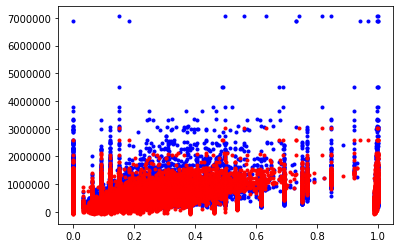

In [92]:
x_test_b=np.c_[np.ones((4322 ,1)),x_test]
y_predict = x_test_b.dot(theta_best)
plt.plot(x_test,y_test,'.b')
plt.plot(x_test,y_predict,'.r')
plt.show()

In [99]:
def Mean_abs_Error(x,theta,iterations,y):
    z=0
    y=np.array(y)
    for i in range(iterations):
        z+= abs((np.dot(x[i,:],theta) - y[i]))
    z=(z/iterations)
    return print(z)
Mean_abs_Error(x_test_b,theta_best,len(x_test),y_test)

134014.85853151948


In [100]:
y_test.mean()#it's the (error value 0.0009851808420545845)
#it's the mean for my test pridection

537762.2549745488